<h2><u>Assignment 1 - MTL 782</u></h2>
<p>Submitted by:</p>
<table>
  <thead>
    <th>Name</th>
    <th>Entry No.</th>
  </thead>
  <tr>
    <td>Jatin Kumar</td>
    <td>2021MT60964</td>
  </tr>
  <tr>
    <td>Vishal Gupta</td>
    <td>2021MT60955</td>
  </tr>
  <tr>
    <td>Tanisha Jangra</td>
    <td>2021MT10927</td>
  </tr>
</table>
</code>

In [ ]:
!pip install tensorflow_decision_forests
!pip install keras_tuner
import numpy as np,copy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import keras_tuner as kt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_excel('./Data-RF.xlsx')

In [ ]:
df['Gender'] = df['Gender'].map(lambda x : x.strip())

In [ ]:
df.sample(5)

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
319,16.00,24,45.0,Female,High,B
463,19.25,24,41.0,Female,High,B
187,14.75,24,63.0,Female,High,A
62,20.75,23,46.0,Female,High,B
220,13.25,24,38.0,Female,High,B-


In [ ]:
df.Grade.value_counts(), df.Attendance.value_counts(), df.Gender.value_counts()

(B-    141
 C-     90
 B      89
 C      71
 A-     39
 A      35
 D      24
 E      11
 Name: Grade, dtype: int64,
 High        415
 Low          59
 Moderate     26
 Name: Attendance, dtype: int64,
 Female    354
 Male      146
 Name: Gender, dtype: int64)

### **Comparing Decision Tree accuracy with/without preprocessing categorical data**

Decision tree without preprocessing


In [ ]:
# performing decision tree model without preprocessing the data
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(df, label="Grade");
model_no_preprocess = tfdf.keras.CartModel()
model_no_preprocess.fit(tf_dataset)

Use /tmp/tmpa83t9smi as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.835703. Found 500 examples.
Training model...
Model trained in 0:00:00.030241
Compiling model...
Model compiled.


In [ ]:
# Fit the model on the dataset
model_no_preprocess.compile(metrics=['accuracy'])
# Evaluate the model on the test dataset
loss, accuracy = model_no_preprocess.evaluate(tf_dataset)

# Print the accuracy
print("Accuracy:", accuracy)
print("loss:", loss)

1/1 [==============================] - 0s 483ms/step - loss: 0.0000e+00 - accuracy: 0.7920
Accuracy: 0.7919999957084656
loss: 0.0


Decision tree with preprocessing
- <u>Gender</u> : One Hot Encoding since Male/Female are equivalent and we cannot assign numerical weightage
- <u>Attendance</u> : assigning more weightage to high attendance (3), moderate (2), low (1)
- <u>Grade</u> : Assign numerical weightage in the order; A > A- > B > B- > C > C- > D > E

In [ ]:
preprocessed_df = copy.deepcopy(df)

In [ ]:
attendance_classes = list(set(preprocessed_df['Attendance']))
attendance_mapping = {cls: i for i, cls in enumerate(attendance_classes)}
preprocessed_df['Attendance'] = preprocessed_df['Attendance'].apply(lambda x: attendance_mapping[x])

In [ ]:
# Convert 'Gender' column to one-hot encoded columns
gender_dummies = pd.get_dummies(df['Gender'], dtype=np.int32)

# Join the one-hot encoded columns to the preprocessed_data DataFrame
preprocessed_data = df.join(gender_dummies)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)


In [ ]:
ordered_grades = ['E', 'D', 'C-', 'C', 'B-', 'B', 'A-', 'A']

# Create a mapping dictionary for grades
grade_mapping = {grade: i for i, grade in enumerate(ordered_grades)}

# Map grades to their corresponding indices using the mapping dictionary
preprocessed_df['Grade'] = preprocessed_df['Grade'].map(grade_mapping)


In [ ]:
preprocessed_df.sample(5)

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
403,5.00,23,54.0,Male,1,4
232,14.50,24,55.0,Female,0,6
276,18.25,24,30.0,Female,2,4
23,5.25,24,46.0,Female,1,4
290,10.75,24,54.0,Female,2,5


In [ ]:
tfdf_preprocessed_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(preprocessed_df, label='Grade')
model_preprocess = tfdf.keras.CartModel()
model_preprocess.fit(tfdf_preprocessed_dataset)

Use /tmp/tmpk2ltewe2 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.485509. Found 500 examples.
Training model...
Model trained in 0:00:00.025849
Compiling model...
Model compiled.


In [ ]:
# Fit the model on the dataset
model_preprocess.compile(metrics=['accuracy'])
# Evaluate the model on the test dataset
loss, accuracy = model_preprocess.evaluate(tfdf_preprocessed_dataset)

# Print the accuracy
print("Accuracy:", accuracy)
print("loss:", loss)

1/1 [==============================] - 0s 173ms/step - loss: 0.0000e+00 - accuracy: 0.8040
Accuracy: 0.8040000200271606
loss: 0.0


From the above code we notice that with preprocessing we are getting accurac 0.80 and withour preprocessing we are getting accuracy  0.791. We conclude that there is only a marginal error of 0.8% in accuracy.

### **Random Forest Model with train-test split**

In [ ]:
X = preprocessed_df.drop(columns=['Grade'])  # Features
y = preprocessed_df['Grade']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Convert Pandas DataFrame to TensorFlow datasets
combined_train = pd.concat([X_train, y_train], axis=1)
combined_test = pd.concat([X_test, y_test], axis=1)

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(combined_train, label="Grade")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(combined_test, label="Grade")

In [ ]:
# Step 3: Train Random Forest Model
# Define and train a Random Forest model using TensorFlow's Decision Forest library
model_rf = tfdf.keras.RandomForestModel(num_trees=30)
model_rf.fit(train_ds)
model_rf.compile(metrics=["accuracy"])




Use /tmp/tmp3y9alohd as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.250798. Found 350 examples.
Training model...
Model trained in 0:00:00.048559
Compiling model...
Model compiled.


In [ ]:
# Evaluate the model using the test set
accuracy_rf = model_rf.evaluate(test_ds)[1]
print("Random Forest Model Accuracy:", accuracy_rf)

1/1 [==============================] - 0s 178ms/step - loss: 0.0000e+00 - accuracy: 0.8400
Random Forest Model Accuracy: 0.8399999737739563


In [ ]:
# Step 4: Visualize the First Tree
# Visualize the structure of the first tree in the trained Random Forest model
tfdf.model_plotter.plot_model_in_colab(model_rf)


### **Implementation of Gradient-Boosting Decision Trees & comparison with Random Forests**

In [ ]:
# Step 5: Implement Gradient Boosted Decision Trees (GBDT)
no_of_trees = np.arange(30) + 1
results = []

for tree_size in no_of_trees:
    # Initialize Gradient Boosted Trees model with specified number of trees
    model_gbdt = tfdf.keras.GradientBoostedTreesModel(num_trees=int(tree_size))

    # Fit the model on the training dataset
    model_gbdt.fit(train_ds)

    # Compile the model with specified metrics
    model_gbdt.compile(metrics=['accuracy', 'binary_crossentropy'])

    # Evaluate the model on the training dataset to check for overfitting
    model_gbdt.evaluate(train_ds, return_dict=True)

    # Evaluate the model on the test dataset|
    evaluation_results = model_gbdt.evaluate(test_ds, return_dict=True)

    # Append the evaluation results to the results list
    results.append([evaluation_results['accuracy'], evaluation_results['binary_crossentropy']])


Use /tmp/tmpwxlby8u5 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.195795. Found 350 examples.
Training model...
Model trained in 0:00:00.035535
Compiling model...


Model compiled.


1/1 [==============================] - 0s 131ms/step - loss: 0.0000e+00 - accuracy: 0.7733 - binary_crossentropy: 7.6456
Use /tmp/tmprpg78ip8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.202837. Found 350 examples.
Training model...
Model trained in 0:00:00.042976
Compiling model...
Model compiled.
1/1 [==============================] - 0s 129ms/step - loss: 0.0000e+00 - accuracy: 0.8067 - binary_crossentropy: 7.8670
Use /tmp/tmpqn4xns1q as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.211281. Found 350 examples.
Training model...
Model trained in 0:00:00.058828
Compiling model...
Model compiled.
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - accuracy: 0.8133 - binary_crossentropy: 8.1494
Use /tmp/tmpefjl3jbb as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.266736. Found 350 examples.
Training model...
Model trained in 0:00:0

In [ ]:
no_of_trees = np.arange(30) + 1
results2 = []

for tree_size in no_of_trees:
    # Initialize Random model with specified number of trees
    model_rf = tfdf.keras.RandomForestModel(num_trees=int(tree_size))

    # Fit the model on the training dataset
    model_rf.fit(train_ds)

    # Compile the model with specified metrics
    model_rf.compile(metrics=['accuracy', 'binary_crossentropy'])

    # Evaluate the model on the training dataset to check for overfitting
    model_rf.evaluate(train_ds, return_dict=True)

    # Evaluate the model on the test dataset|
    evaluation_results = model_rf.evaluate(test_ds, return_dict=True)

    # Append the evaluation results to the results list
    results2.append([evaluation_results['accuracy'], evaluation_results['binary_crossentropy']])


Use /tmp/tmpgrtj90_h as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.237373. Found 350 examples.
Training model...
Model trained in 0:00:00.026576
Compiling model...
Model compiled.
1/1 [==============================] - 1s 777ms/step - loss: 0.0000e+00 - accuracy: 0.7533 - binary_crossentropy: 45.8735
Use /tmp/tmpdzdet94r as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.251427. Found 350 examples.
Training model...
Model trained in 0:00:00.024694
Compiling model...
Model compiled.
1/1 [==============================] - 0s 135ms/step - loss: 0.0000e+00 - accuracy: 0.7667 - binary_crossentropy: 45.4883
Use /tmp/tmpyuz7et15 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.217169. Found 350 examples.
Training model...
Model trained in 0:00:00.025719
Compiling model...
Model compiled.
1/1 [==============================] - 0s 133ms/step - loss: 0.0000e+00 - a

In [ ]:
results = np.array(results);
results2 = np.array(results2);

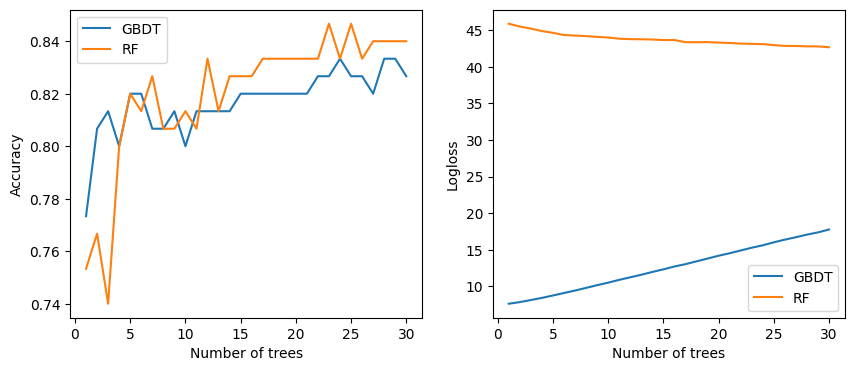

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(no_of_trees, results[:, 0])
ax[0].plot(no_of_trees, results2[:, 0])
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Number of trees')
ax[0].legend(['GBDT', 'RF'])

ax[1].plot(no_of_trees, results[:, 1])
ax[1].plot(no_of_trees, results2[:, 1])
ax[1].set_ylabel('Logloss')
ax[1].set_xlabel('Number of trees')
ax[1].legend(['GBDT', 'RF'])

plt.show()

### **Train vs Test accuracies for Random-Forest with max_depth and num_trees hyperparameters**

Use /tmp/tmpaw_l9mo_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.240180. Found 350 examples.
Training model...
Model trained in 0:00:00.025400
Compiling model...
Model compiled.
1/1 [==============================] - 0s 95ms/step - loss: 0.0000e+00 - accuracy: 0.8371
Use /tmp/tmpzm803rz_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.212904. Found 350 examples.
Training model...
Model trained in 0:00:00.028724
Compiling model...
Model compiled.
1/1 [==============================] - 0s 95ms/step - loss: 0.0000e+00 - accuracy: 0.8657
Use /tmp/tmp_ifty5mp as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.205456. Found 350 examples.
Training model...
Model trained in 0:00:00.025645
Compiling model...
Model compiled.
1/1 [==============================] - 0s 97ms/step - loss: 0.0000e+00 - accuracy: 0.8714
Use /tmp/tmpys490mgf as temporary training direct

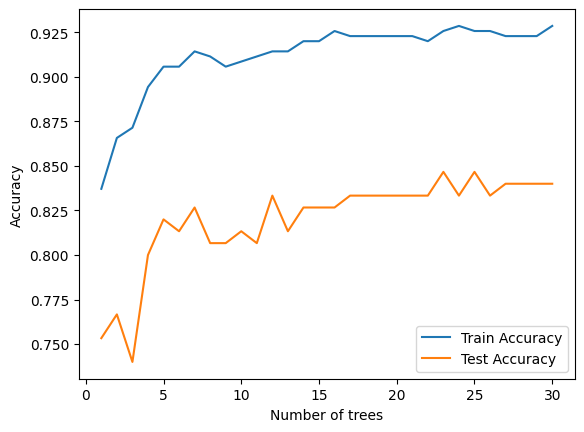

In [ ]:
train_acc = []
test_acc = []

for tree_size in no_of_trees:
    # Initialize Gradient Boosted Trees model with specified number of trees
    model_rf = tfdf.keras.RandomForestModel(num_trees=int(tree_size))

    # Fit the model on the training dataset
    model_rf.fit(train_ds)

    # Compile the model with accuracy metric
    model_rf.compile(metrics=['accuracy'])

    # Evaluate the model on the test dataset
    evaluation_results_test = model_rf.evaluate(test_ds, return_dict=True)
    test_acc.append(evaluation_results_test['accuracy'])

    # Evaluate the model on the training dataset
    evaluation_results_train = model_rf.evaluate(train_ds, return_dict=True)
    train_acc.append(evaluation_results_train['accuracy'])



As expected accuracy on training data is always higher than accuracy on testing data

Use /tmp/tmpis40vogt as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.223044. Found 350 examples.
Training model...
Model trained in 0:00:00.031187
Compiling model...
Model compiled.
1/1 [==============================] - 0s 96ms/step - loss: 0.0000e+00 - accuracy: 0.2600
Use /tmp/tmpjglscis8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.424721. Found 350 examples.
Training model...
Model trained in 0:00:00.035502
Compiling model...
Model compiled.
1/1 [==============================] - 0s 114ms/step - loss: 0.0000e+00 - accuracy: 0.2600
Use /tmp/tmp1yi1xspg as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.254580. Found 350 examples.
Training model...
Model trained in 0:00:00.047352
Compiling model...
Model compiled.
1/1 [==============================] - 0s 106ms/step - loss: 0.0000e+00 - accuracy: 0.4114
Use /tmp/tmpfu7lwpua as temporary training dire

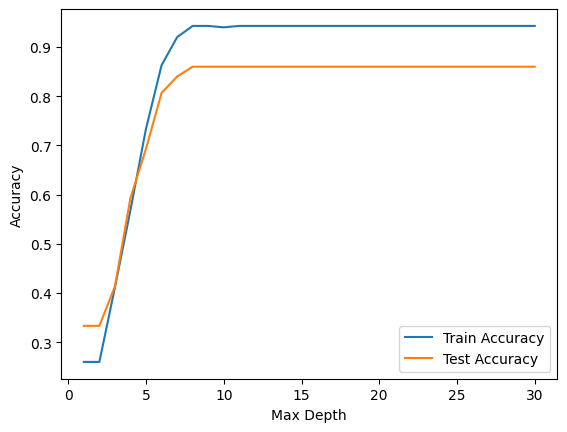

In [ ]:
train_acc = [];
test_acc = [];

depthLst = np.arange(30);

for depth in depthLst:
  model_rf = tfdf.keras.RandomForestModel(max_depth=int(depth))

  # Fit the model on the training dataset
  model_rf.fit(train_ds)

  # Compile the model with accuracy metric
  model_rf.compile(metrics=['accuracy'])

  # Evaluate the model on the test dataset
  evaluation_results_test = model_rf.evaluate(test_ds, return_dict=True)
  test_acc.append(evaluation_results_test['accuracy'])

  # Evaluate the model on the training dataset
  evaluation_results_train = model_rf.evaluate(train_ds, return_dict=True)
  train_acc.append(evaluation_results_train['accuracy'])

plt.plot(no_of_trees, train_acc)
plt.plot(no_of_trees, test_acc)
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

In [ ]:
depth = np.arange(30);
no_of_trees = np.arange(30) + 1
def build_model(hp):
  model = tfdf.keras.RandomForestModel(max_depth=hp.Choice("max_depth", [int(i) for i in depth]), num_trees=hp.Choice("num_trees", [int(i) for i in no_of_trees]))
  model.compile(metrics=['accuracy'])
  return model;

tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=80)
tuner.search(x=train_ds, validation_data=test_ds)

best_model = tuner.get_best_models()[0]
print("Best hyperparameters: ", tuner.get_best_hyperparameters()[0].values)

Trial 80 Complete [00h 00m 02s]
val_accuracy: 0.8399999737739563

Best val_accuracy So Far: 0.8533333539962769
Total elapsed time: 00h 01m 51s
Use /tmp/tmp6itflvda as temporary training directory
Best hyperparameters:  {'max_depth': 29, 'num_trees': 25}
